# K_func paper analysis exploration

In [1]:
import csv
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline 
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

In [2]:
dirname = dirname = '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon'

In [3]:
files = glob.glob(os.path.join(dirname, '*events*.csv'))

In [4]:
files

['/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0815_Pos12_Scr-59_N_events_wtdiv_rad_1600_t_range_1600_focal_t_732.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0805_Pos5_Scr-1050_N_events_wtdiv_rad_1600_t_range_1600_focal_t_648.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0797_Pos20_Scr-146_N_events_wtdiv_rad_1600_t_range_1600_focal_t_562.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0796_Pos24_Scr-946_N_events_wtdiv_rad_1600_t_range_1600_focal_t_905.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0819_Pos2_Scr-491_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1056.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0795_Pos3_Scr-167_N_events_wtdiv_rad_1600_t_range_1600_focal_t_742.csv',
 '/home/nathan/data/results/radial_analysi

### Cumulative division measures 

In [7]:
N_events_df = []#pd.DataFrame([], columns=['Cell ID', 'Distance', 'Time'])
for file in tqdm(files):
    df = pd.read_csv(file, names = ['Cell ID', 'Distance', 'Time'])
    ### tidy up dataframe
    df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
    df['Time'] = df['Time'].str.replace('[()]', '')
    df = df.astype(int)
    ### normalise time
    apop_time = int(re.search('t_(\d+)', file).group(1))
    df['Time'] = df['Time'] - apop_time
    N_events_df.append(df)
N_events_df = pd.concat(N_events_df, axis = 0, ignore_index = True)

  0%|          | 0/1839 [00:00<?, ?it/s]

<ipython-input-7-12a7a87b5b25>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
<ipython-input-7-12a7a87b5b25>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = df['Time'].str.replace('[()]', '')


In [8]:
N_events_df['Time'] = N_events_df['Time']*(4/60)
N_events_df['Distance'] = N_events_df['Distance']/3

### This dataframe shows all WT division events around all focal Scr apoptoses

In [9]:
N_events_df

,Cell ID,Distance,Time
0,26,178.000000,-12.000000
1,19,262.666667,-34.400000
2,20,300.333333,-35.533333
3,23,255.333333,-24.466667
4,24,148.333333,-19.600000
...,...,...,...
476334,3309,398.333333,33.866667
476335,3414,170.333333,34.733333
476336,3425,371.333333,34.600000
476337,3433,370.000000,35.400000


In [10]:
del N_events_df['Cell ID']

In [11]:
N_events_df

,Distance,Time
0,178.000000,-12.000000
1,262.666667,-34.400000
2,300.333333,-35.533333
3,255.333333,-24.466667
4,148.333333,-19.600000
...,...,...
476334,398.333333,33.866667
476335,170.333333,34.733333
476336,371.333333,34.600000
476337,370.000000,35.400000


# Closest neighbour analysis

"For each death event, we calculated the Euclidean distance to the closest death in a given time window. Based on the previous analysis, we selected windows of 20’ to 1h20’, 1h20’ to 2h20’ and 2h20’ to 3h20’. We excluded the first 20 minutes as they correspond to
the characteristic time of extrusion (where cells cannot be reverted anymore). We then ordered these shortest distances by size and
plotted the cumulative probability of closest death at a given distance. A value of 40% at a distance of 10 micrometers means than
40% of the closest deaths are localized between 0 and 10 micrometers away"

#### Plotting cumulative distribution of cell divisions around apoptoses

<AxesSubplot:xlabel='Distance (μm)', ylabel='Proportion'>

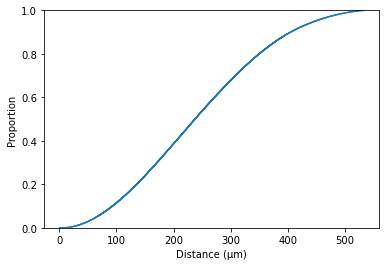

In [15]:
sb.ecdfplot(data=N_events_df, x="Distance (μm)")

# Segregate on different time windows

In [141]:
selective_df = pd.DataFrame([])#, columns=['Cell ID', 'Distance', 'Time'])
selective_df['Distance (μm)'] = N_events_df['Distance (μm)']
selective_df['Time (hrs)'] = N_events_df['Time (hrs)']
selective_df['Cell ID'] = N_events_df['Cell ID']

In [142]:
selective_df

,Distance (μm),Time (hrs),Cell ID
0,262.666667,-34.400000,19
1,300.333333,-35.533333,20
2,255.333333,-24.466667,23
3,148.333333,-19.600000,24
4,308.666667,-39.400000,2
...,...,...,...
474495,398.333333,33.866667,3309
474496,170.333333,34.733333,3414
474497,371.333333,34.600000,3425
474498,370.000000,35.400000,3433


In [143]:
temporal_binned = {}
step = 1
t_range = 10

In [144]:
range(-t_range, t_range, step)

range(-10, 10)

In [146]:
selective_df.loc[(selective_df['Time (hrs)'] >= time_bin[0]) & (selective_df['Time (hrs)'] <= time_bin[1])]


,Distance (μm),Time (hrs),Cell ID
104,333.333333,4.533333,641
126,189.000000,4.666667,899
149,221.333333,5.000000,1022
200,270.000000,4.533333,1257
341,189.666667,5.000000,948
...,...,...,...
473705,333.000000,4.733333,679
473910,520.333333,4.666667,127
474005,221.666667,4.533333,108
474010,215.333333,4.666667,127


In [147]:
for time_bin in [(i, i+step) for i in np.arange(-t_range, t_range, step)]:
    temporal_binned[time_bin] = selective_df.loc[(selective_df['Time (hrs)'] >= time_bin[0]) & (selective_df['Time (hrs)'] <= time_bin[1])]


In [148]:
temporal_binned

{(-10,
  -9):         Distance (μm)  Time (hrs)  Cell ID
 37         253.333333   -9.400000      194
 59          56.666667   -9.333333      311
 415         34.000000   -9.600000      330
 421         46.333333   -9.000000      373
 424        276.000000   -9.666667      390
 ...               ...         ...      ...
 473598     348.666667   -9.933333      313
 473636     166.333333   -9.066667      446
 473639     158.666667  -10.000000      449
 473643     218.000000   -9.533333      458
 473998     211.000000   -9.533333       33
 
 [6944 rows x 3 columns],
 (-9,
  -8):         Distance (μm)  Time (hrs)  Cell ID
 15         313.666667   -8.400000       11
 29         304.000000   -8.533333      120
 66         229.666667   -8.800000      373
 421         46.333333   -9.000000      373
 425         26.666667   -8.000000      394
 ...               ...         ...      ...
 473956     156.000000   -8.866667       87
 473960     228.000000   -8.466667       83
 473969     138.000000 

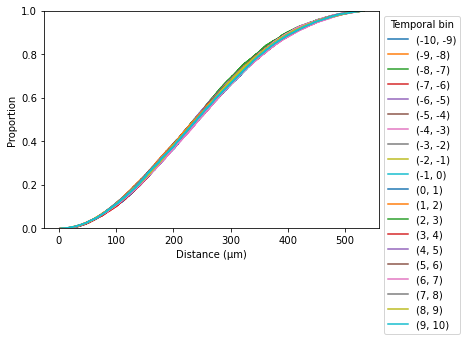

In [149]:
for i in temporal_binned:
    sb.ecdfplot(data=temporal_binned[i]['Distance (μm)'], label = i)
plt.legend(labels=temporal_binned, title = 'Temporal bin', loc = 2,bbox_to_anchor = (1,1))

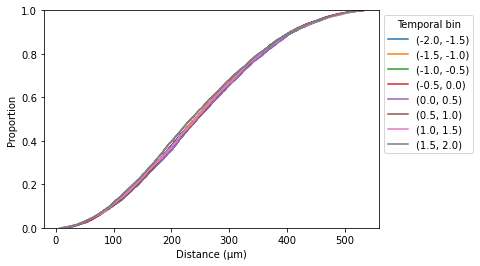

In [156]:
temporal_binned = {}
step = 0.5
t_range = 2

for time_bin in [(i, i+step) for i in np.arange(-t_range, t_range, step)]:
    temporal_binned[time_bin] = selective_df.loc[(selective_df['Time (hrs)'] >= time_bin[0]) & (selective_df['Time (hrs)'] <= time_bin[1])]


for i in temporal_binned:
    sb.ecdfplot(data=temporal_binned[i]['Distance (μm)'], label = i)
plt.legend(labels=temporal_binned, title = 'Temporal bin', loc = 2,bbox_to_anchor = (1,1))

 A value of 0.4 at ~200micrometers means that 40% of local cell divisions happened within 200um. 

# Heatmap

In [44]:
df = pd.DataFrame()
df['Time (hrs)'], df['Distance (μm)'] = N_events_df['Time (hrs)'], N_events_df['Distance (μm)']

Text(0.5, 1.0, 'Distribution of wild-type divisions around Scribble apoptoses')

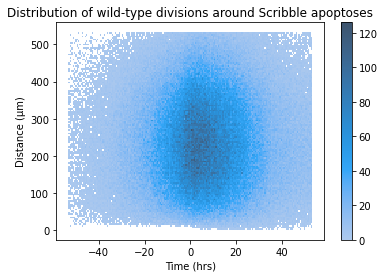

In [46]:
sb.histplot(N_events_df, x = 'Time (hrs)', y = 'Distance (μm)', cbar = True)
plt.title('Distribution of wild-type divisions around Scribble apoptoses')

##### Now for N_cells too

In [12]:
files = glob.glob(os.path.join(dirname, '*N_cells*.csv'))

In [13]:
files

['/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0797_Pos4_Scr-142_N_cells_wt_rad_1600_t_range_1600_focal_t_347.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0817_Pos23_Scr-48_N_cells_wt_rad_1600_t_range_1600_focal_t_729.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0815_Pos11_Scr-277_N_cells_wt_rad_1600_t_range_1600_focal_t_674.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0796_Pos23_Scr-968_N_cells_wt_rad_1600_t_range_1600_focal_t_700.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0819_Pos3_Scr-48_N_cells_wt_rad_1600_t_range_1600_focal_t_897.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0819_Pos5_Scr-146_N_cells_wt_rad_1600_t_range_1600_focal_t_318.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1

In [14]:
N_cells_df = []
for file in tqdm(files[0:200]):
    df = pd.read_csv(file, names = ['Cell ID', 'Distance', 'Time'])          
    ### tidy up dataframe
    df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
    df['Time'] = df['Time'].str.replace('[()]', '')
    df = df.astype(int)
    ### normalise time
    apop_time = int(re.search('t_(\d+)', file).group(1))
    df['Time'] = df['Time'] - apop_time
    df['Time'] = df['Time']*(4/60)
    df['Distance'] = df['Distance']/3
    del df['Cell ID']
    N_cells_df.append(df)
N_cells_df= pd.concat(N_cells_df, axis = 0, ignore_index = True)

  0%|          | 0/200 [00:00<?, ?it/s]

<ipython-input-14-af1f9d014557>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
<ipython-input-14-af1f9d014557>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = df['Time'].str.replace('[()]', '')


In [17]:
len(N_cells_df)/10

314967739

In [15]:
N_cells_crop = N_cells_df#N_cells_df[0:int(len(N_cells_df)/5)]

In [16]:
N_cells_crop

,Distance,Time
0,337.666667,-17.866667
1,306.000000,-17.866667
2,396.333333,-17.866667
3,346.333333,-17.866667
4,520.666667,-17.866667
...,...,...
36307096,301.333333,22.733333
36307097,133.666667,22.733333
36307098,133.666667,22.733333
36307099,355.000000,22.733333


<AxesSubplot:xlabel='Time', ylabel='Distance'>

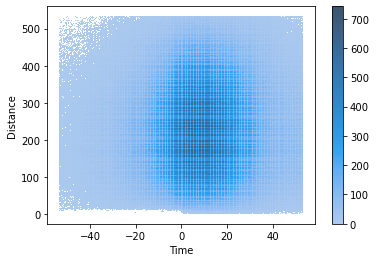

In [28]:
sb.histplot(N_cells_crop, x = 'Time', y = 'Distance', kde = True, cbar = True)

# Plot an overlay of both??

In [18]:
N_events_df['Instance'] = 'Mitosis'

In [20]:
N_cells_crop['Instance'] = 'Cell appearance'

In [19]:
N_events_df

,Distance,Time,Instance
0,178.000000,-12.000000,Mitosis
1,262.666667,-34.400000,Mitosis
2,300.333333,-35.533333,Mitosis
3,255.333333,-24.466667,Mitosis
4,148.333333,-19.600000,Mitosis
...,...,...,...
476334,398.333333,33.866667,Mitosis
476335,170.333333,34.733333,Mitosis
476336,371.333333,34.600000,Mitosis
476337,370.000000,35.400000,Mitosis


In [21]:
N_cells_events = pd.concat([N_cells_crop, N_events_df], axis = 0, ignore_index= True)

In [22]:
N_cells_events

,Distance,Time,Instance
0,337.666667,-17.866667,Cell appearance
1,306.000000,-17.866667,Cell appearance
2,396.333333,-17.866667,Cell appearance
3,346.333333,-17.866667,Cell appearance
4,520.666667,-17.866667,Cell appearance
...,...,...,...
36783435,398.333333,33.866667,Mitosis
36783436,170.333333,34.733333,Mitosis
36783437,371.333333,34.600000,Mitosis
36783438,370.000000,35.400000,Mitosis


In [29]:
len([i for i in range(0, 36783440, 10)])

3678344

In [32]:
N_cells_events_crop = N_cells_events.drop([i for i in range(0, 36783440, 2)])

In [33]:
N_cells_events_crop

,Distance,Time,Instance
1,306.000000,-17.866667,Cell appearance
3,346.333333,-17.866667,Cell appearance
5,424.333333,-17.866667,Cell appearance
7,388.333333,-17.866667,Cell appearance
9,333.666667,-17.866667,Cell appearance
...,...,...,...
36783431,403.333333,33.866667,Mitosis
36783433,397.666667,32.533333,Mitosis
36783435,398.333333,33.866667,Mitosis
36783437,371.333333,34.600000,Mitosis


<AxesSubplot:xlabel='Time', ylabel='Distance'>

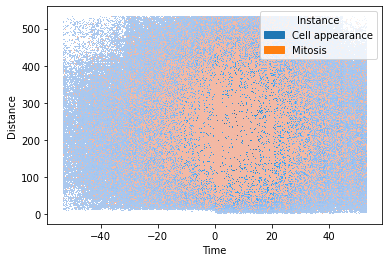

In [36]:
sb.histplot(N_cells_events_crop, x = 'Time', y = 'Distance', hue = 'Instance')

<AxesSubplot:xlabel='Time', ylabel='Distance'>

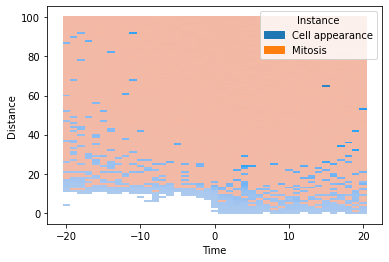

In [43]:
sb.histplot(N_cells_events_crop, x = 'Time', y = 'Distance', hue = 'Instance', bins = (10,10), binrange = ((-20,20),(0,100)), discrete=(True, True))

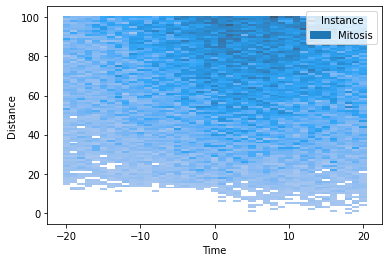

In [44]:
event_plot = sb.histplot(N_events_df, x = 'Time', y = 'Distance', hue = 'Instance', bins = (10,10), binrange = ((-20,20),(0,100)), discrete=(True, True))

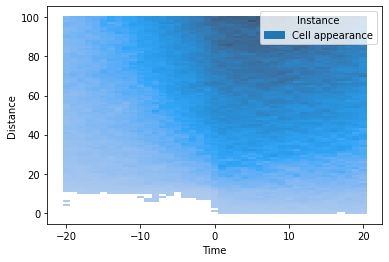

In [45]:
cells_plot = sb.histplot(N_cells_crop, x = 'Time', y = 'Distance', hue = 'Instance', bins = (10,10), binrange = ((-20,20),(0,100)), discrete=(True, True))

#### Is there a way to make the P(div) graphs from seaborn plots?

# Analytic calculation of the cumulative probability of a Poisson process

Need the intrinsic division rate per hour

Need to count for each experiment then average over all expts

In [220]:
expt_list = set(['GV'+file.split('GV')[1][0:4]+'_Pos'+file.split('Pos')[1][0:2].replace('_','') for file in files])

In [250]:
expt_list

{'GV0794_Pos4',
 'GV0794_Pos5',
 'GV0794_Pos6',
 'GV0794_Pos7',
 'GV0794_Pos8',
 'GV0795_Pos16',
 'GV0795_Pos17',
 'GV0795_Pos18',
 'GV0795_Pos3',
 'GV0795_Pos4',
 'GV0795_Pos5',
 'GV0795_Pos6',
 'GV0795_Pos7',
 'GV0795_Pos8',
 'GV0796_Pos19',
 'GV0796_Pos20',
 'GV0796_Pos21',
 'GV0796_Pos22',
 'GV0796_Pos23',
 'GV0796_Pos24',
 'GV0796_Pos3',
 'GV0796_Pos4',
 'GV0796_Pos5',
 'GV0796_Pos6',
 'GV0796_Pos7',
 'GV0796_Pos8',
 'GV0797_Pos18',
 'GV0797_Pos19',
 'GV0797_Pos20',
 'GV0797_Pos21',
 'GV0797_Pos22',
 'GV0797_Pos23',
 'GV0797_Pos3',
 'GV0797_Pos4',
 'GV0797_Pos5',
 'GV0797_Pos6',
 'GV0797_Pos7',
 'GV0797_Pos8',
 'GV0798_Pos18',
 'GV0798_Pos20',
 'GV0798_Pos21',
 'GV0798_Pos22',
 'GV0798_Pos23',
 'GV0798_Pos4',
 'GV0798_Pos5',
 'GV0798_Pos6',
 'GV0798_Pos7',
 'GV0798_Pos8',
 'GV0800_Pos15',
 'GV0800_Pos16',
 'GV0800_Pos17',
 'GV0800_Pos3',
 'GV0800_Pos4',
 'GV0800_Pos5',
 'GV0800_Pos6',
 'GV0800_Pos7',
 'GV0800_Pos8',
 'GV0801_Pos3',
 'GV0801_Pos4',
 'GV0801_Pos5',
 'GV0802_Pos3',
 

In [238]:
cumu_expt_df = {}
for expt in tqdm(expt_list):
    cumu_expt_df[expt] = []
    for file in files:
        if expt in file:
            df = pd.read_csv(file, names = ['Cell ID', 'Distance', 'Time'])
            ### tidy up dataframe
            df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
            df['Time'] = df['Time'].str.replace('[()]', '')
            df = df.astype(int)
            ### normalise time
            df['Frame'] = df['Time']
            apop_time = int(re.search('t_(\d+)', file).group(1))
            df['Time'] = df['Time'] - apop_time
            df['Time'] = df['Time']*(4/60)
            df['Distance'] = df['Distance']/3
            cumu_expt_df[expt].append(df)
    cumu_expt_df[expt] = pd.concat(cumu_expt_df[expt], axis = 0, ignore_index = True)

  0%|          | 0/110 [00:00<?, ?it/s]

<ipython-input-238-6b1e1e77cad7>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
<ipython-input-238-6b1e1e77cad7>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = df['Time'].str.replace('[()]', '')


In [239]:
cumu_expt_df['GV0794_Pos4']

,Cell ID,Distance,Time,Frame
0,135,406.666667,2.400000,809
1,139,427.333333,-8.866667,640
2,154,448.000000,3.133333,820
3,166,167.000000,-9.266667,634
4,168,143.333333,-8.866667,640
...,...,...,...,...
342,605,275.666667,28.600000,898
343,612,230.666667,25.933333,858
344,714,290.666667,28.600000,898
345,849,228.333333,31.666667,944


In [200]:
len(cumu_df)

474500

number of divisions in each expt

In [226]:
for i in cumu_expt_df:
    print(i, len(cumu_expt_df[i]))

GV0797_Pos18 3009
GV0796_Pos5 8475
GV0815_Pos11 7418
GV0801_Pos4 6035
GV0800_Pos5 457
GV0798_Pos23 7792
GV0813_Pos1 1477
GV0800_Pos6 950
GV0798_Pos21 9318
GV0818_Pos12 6346
GV0820_Pos0 3981
GV0817_Pos23 12979
GV0819_Pos4 14433
GV0796_Pos19 4009
GV0813_Pos0 344
GV0800_Pos15 3883
GV0819_Pos1 2869
GV0794_Pos8 143
GV0795_Pos7 4951
GV0819_Pos3 15644
GV0798_Pos6 2404
GV0796_Pos3 5460
GV0815_Pos12 3544
GV0805_Pos4 6751
GV0806_Pos5 693
GV0800_Pos4 4918
GV0801_Pos3 5749
GV0796_Pos8 2074
GV0815_Pos23 1597
GV0795_Pos8 2558
GV0815_Pos0 5059
GV0820_Pos1 5868
GV0800_Pos7 7431
GV0816_Pos0 427
GV0795_Pos16 1062
GV0797_Pos6 2026
GV0802_Pos4 5495
GV0795_Pos6 2136
GV0798_Pos7 6749
GV0816_Pos14 1115
GV0794_Pos5 47
GV0814_Pos12 2465
GV0797_Pos7 4670
GV0819_Pos5 9139
GV0798_Pos18 846
GV0802_Pos5 826
GV0796_Pos23 3220
GV0797_Pos22 420
GV0796_Pos24 4324
GV0794_Pos7 322
GV0795_Pos17 1751
GV0797_Pos3 6591
GV0795_Pos3 2190
GV0819_Pos2 8881
GV0816_Pos23 876
GV0801_Pos5 3742
GV0797_Pos4 19501
GV0796_Pos6 1498
GV07

In [240]:
cumu_expt_df['GV0806_Pos4']

,Cell ID,Distance,Time,Frame
0,328,120.000000,1.666667,816
1,340,61.666667,0.066667,792
2,386,119.333333,3.200000,839
3,490,218.333333,0.933333,805
4,499,153.333333,7.133333,898
...,...,...,...,...
13908,4396,261.333333,18.933333,1163
13909,4468,135.666667,15.400000,1110
13910,4491,64.000000,18.533333,1157
13911,4510,176.333333,16.133333,1121


#### how many repeat measures of divisions are there?

(array([2784., 3111., 3156., 2271., 1485.,  596.,  127.,  134.,  142.,
         107.]),
 array([2.0000e+00, 4.8850e+02, 9.7500e+02, 1.4615e+03, 1.9480e+03,
        2.4345e+03, 2.9210e+03, 3.4075e+03, 3.8940e+03, 4.3805e+03,
        4.8670e+03]),
 <BarContainer object of 10 artists>)

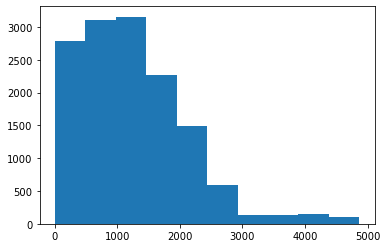

In [241]:
plt.hist(cumu_expt_df['GV0806_Pos4']['Cell ID'])


In [242]:
cumu_expt_df['GV0806_Pos4'].loc[cumu_expt_df['GV0806_Pos4']['Cell ID'] == 1000]

,Cell ID,Distance,Time,Frame
28,1000,462.000000,4.933333,865
577,1000,71.000000,21.000000,865
1116,1000,58.000000,21.466667,865
1731,1000,288.333333,0.133333,865
2405,1000,476.000000,-12.533333,865
3067,1000,112.666667,-5.466667,865
3771,1000,437.666667,0.933333,865
4196,1000,58.000000,-4.133333,865
4870,1000,299.333333,49.666667,865
5217,1000,113.666667,19.000000,865


This df shows that for many different apoptosis in this experimental position, it has counted the same division (cell ID 1000, frame 865) many times. 

# Measuring the scope (spatio-temporal) of each individual scan

In [6]:
files = glob.glob(os.path.join(dirname, '*N_cells*.csv'))

In [7]:
scan_list = set([os.path.basename(file.split('_N_cells')[0]) for file in files])

In [8]:
len(scan_list)

1839

In [ ]:
N_cells_scan_df = {}
for scan in tqdm(scan_list):
    N_cells_scan_df[scan] = []
    for file in files:
        if scan in file:
            df = pd.read_csv(file, names = ['Cell ID', 'Distance', 'Time'])          
            ### tidy up dataframe
            df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
            df['Time'] = df['Time'].str.replace('[()]', '')
            df = df.astype(int)
            ### normalise time
            #df['Frame'] = df['Time']
            apop_time = int(re.search('t_(\d+)', file).group(1))
            df['Time'] = df['Time'] - apop_time
            df['Time'] = df['Time']*(4/60)
            df['Distance'] = df['Distance']/3
            #del df['Frame']
            del df['Cell ID']
            N_cells_scan_df[scan].append(df)
    N_cells_scan_df[scan] = pd.concat(N_cells_scan_df[scan], axis = 0, ignore_index = True)

# Spatiotemporal range of each scan

In [381]:
scan_time_ranges = {}
for n, i in enumerate(N_cells_scan_df):
    scan_time_ranges[i] = {}
    full_t_range = (max(N_cells_scan_df[i]['Time']) - min(N_cells_scan_df[i]['Time']))
    full_radius = max(N_cells_scan_df[i]['Distance'])
    scan_time_ranges[i]['Time range'] = full_t_range
    scan_time_ranges[i]['Distance range'] = full_radius

In [313]:
1600*4/60

106.66666666666667

In [426]:
scan_time_ranges

{'GV0796_Pos21_Scr-257': {'Time range': 48.53333333333333,
  'Distance range': 533.3333333333334},
 'GV0817_Pos0_Scr-366': {'Time range': 59.46666666666666,
  'Distance range': 452.0},
 'GV0798_Pos8_Scr-86': {'Time range': 20.133333333333333,
  'Distance range': 526.3333333333334},
 'GV0815_Pos12_Scr-373': {'Time range': 28.333333333333336,
  'Distance range': 533.0},
 'GV0798_Pos21_Scr-365': {'Time range': 44.0, 'Distance range': 533.0},
 'GV0798_Pos20_Scr-343': {'Time range': 25.133333333333333,
  'Distance range': 533.0},
 'GV0796_Pos6_Scr-30': {'Time range': 59.4, 'Distance range': 533.0},
 'GV0818_Pos13_Scr-107': {'Time range': 59.733333333333334,
  'Distance range': 460.3333333333333},
 'GV0797_Pos6_Scr-670': {'Time range': 20.333333333333332,
  'Distance range': 497.0},
 'GV0798_Pos4_Scr-344': {'Time range': 30.46666666666667,
  'Distance range': 533.0},
 'GV0801_Pos4_Scr-25': {'Time range': 78.8,
  'Distance range': 523.3333333333334},
 'GV0819_Pos2_Scr-679': {'Time range': 46.

### Distribution of scan time ranges in hours

Text(0, 0.5, 'Frequency')

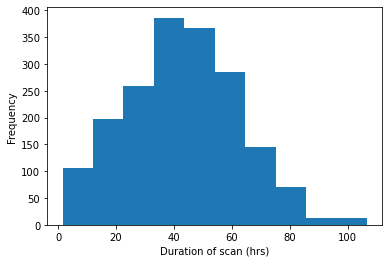

In [429]:
plt.hist([scan_time_ranges[i]['Time range'] for i in scan_time_ranges])
plt.xlabel('Duration of scan (hrs)')
plt.ylabel('Frequency')

### Plotting the distribution of scan radial ranges too 

Text(0, 0.5, 'Frequency')

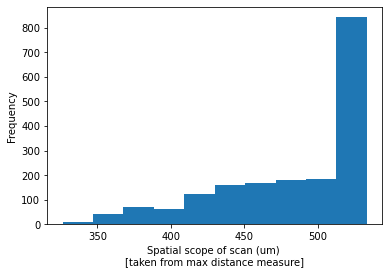

In [431]:
plt.hist([scan_time_ranges[i]['Distance range'] for i in scan_time_ranges])
plt.xlabel('Spatial scope of scan (um) \n[taken from max distance measure]')
plt.ylabel('Frequency')

# Now load all mitoses into individual scan dfs and calculate density

In [369]:
files = glob.glob(os.path.join(dirname, '*N_events*.csv'))

scan_list = set([os.path.basename(file.split('_N_events')[0]) for file in files])

In [370]:
files

['/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0815_Pos12_Scr-59_N_events_wtdiv_rad_1600_t_range_1600_focal_t_732.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0805_Pos5_Scr-1050_N_events_wtdiv_rad_1600_t_range_1600_focal_t_648.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0797_Pos20_Scr-146_N_events_wtdiv_rad_1600_t_range_1600_focal_t_562.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0796_Pos24_Scr-946_N_events_wtdiv_rad_1600_t_range_1600_focal_t_905.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0819_Pos2_Scr-491_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1056.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0795_Pos3_Scr-167_N_events_wtdiv_rad_1600_t_range_1600_focal_t_742.csv',
 '/home/nathan/data/results/radial_analysi

In [371]:
scan_list

{'GV0796_Pos21_Scr-257',
 'GV0817_Pos0_Scr-366',
 'GV0798_Pos8_Scr-86',
 'GV0815_Pos12_Scr-373',
 'GV0796_Pos6_Scr-30',
 'GV0798_Pos20_Scr-343',
 'GV0798_Pos21_Scr-365',
 'GV0818_Pos13_Scr-107',
 'GV0797_Pos6_Scr-670',
 'GV0798_Pos4_Scr-344',
 'GV0801_Pos4_Scr-25',
 'GV0819_Pos2_Scr-679',
 'GV0797_Pos7_Scr-200',
 'GV0817_Pos11_Scr-374',
 'GV0798_Pos20_Scr-441',
 'GV0814_Pos11_Scr-222',
 'GV0795_Pos4_Scr-285',
 'GV0815_Pos11_Scr-9',
 'GV0795_Pos3_Scr-167',
 'GV0800_Pos5_Scr-155',
 'GV0806_Pos4_Scr-337',
 'GV0798_Pos23_Scr-1227',
 'GV0800_Pos7_Scr-27',
 'GV0819_Pos1_Scr-434',
 'GV0820_Pos2_Scr-441',
 'GV0816_Pos23_Scr-269',
 'GV0797_Pos4_Scr-24',
 'GV0818_Pos13_Scr-282',
 'GV0798_Pos6_Scr-831',
 'GV0798_Pos20_Scr-240',
 'GV0817_Pos12_Scr-608',
 'GV0820_Pos1_Scr-970',
 'GV0795_Pos3_Scr-347',
 'GV0813_Pos1_Scr-185',
 'GV0815_Pos0_Scr-557',
 'GV0797_Pos4_Scr-750',
 'GV0819_Pos2_Scr-490',
 'GV0796_Pos5_Scr-175',
 'GV0797_Pos4_Scr-23',
 'GV0813_Pos3_Scr-220',
 'GV0796_Pos22_Scr-659',
 'GV0796

In [372]:
cumu_scan_df = {}
for scan in tqdm(scan_list):
    cumu_scan_df[scan] = []
    for file in files:
        if scan in file:
            df = pd.read_csv(file, names = ['Cell ID', 'Distance', 'Time'])
            ### tidy up dataframe
            df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
            df['Time'] = df['Time'].str.replace('[()]', '')
            df = df.astype(int)
            ### normalise time
            df['Frame'] = df['Time']
            apop_time = int(re.search('t_(\d+)', file).group(1))
            df['Time'] = df['Time'] - apop_time
            df['Time'] = df['Time']*(4/60)
            df['Distance'] = df['Distance']/3
            cumu_scan_df[scan].append(df)
    cumu_scan_df[scan] = pd.concat(cumu_scan_df[scan], axis = 0, ignore_index = True)

  0%|          | 0/1839 [00:00<?, ?it/s]

<ipython-input-372-742ce74e93d7>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
<ipython-input-372-742ce74e93d7>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = df['Time'].str.replace('[()]', '')


In [373]:
cumu_scan_df

{'GV0796_Pos21_Scr-257':      Cell ID    Distance       Time  Frame
 0         33  367.333333 -37.666667    295
 1         40  376.333333 -33.600000    356
 2         44  142.000000 -39.200000    272
 3         45  139.333333 -37.066667    304
 4         50  176.000000 -33.400000    359
 ..       ...         ...        ...    ...
 545     2750  475.666667   6.466667    957
 546     2900  517.333333   6.733333    961
 547     2998  100.000000   6.200000    953
 548     3025  481.000000   7.000000    965
 549     3072  290.666667   8.000000    980
 
 [550 rows x 4 columns],
 'GV0817_Pos0_Scr-366':      Cell ID    Distance       Time  Frame
 0         29  304.000000 -12.266667    319
 1         34  139.333333  -3.600000    449
 2          1  330.000000  -8.466667    376
 3          3   86.000000  12.133333    685
 4          4  115.000000   3.533333    556
 ..       ...         ...        ...    ...
 271     3377  266.333333  44.800000   1175
 272     3398  366.333333  44.133333   1165
 2

In [432]:
div_rate = []
for i in cumu_scan_df:
    div_rate.append(len(cumu_scan_df[i])/scan_time_ranges[i]['Time range'])

Text(0.5, 1.0, 'Distribution of division rates (N. div per hour)')

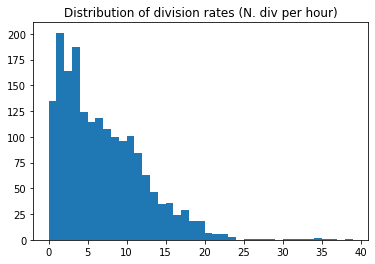

In [433]:
plt.hist(div_rate, bins = np.arange(0,40))
plt.title('Distribution of division rates (N. div per hour)')

# Mean division rate over all movies is 0.118 per min

In [481]:
## per hour seems to be 7 div 
np.mean(div_rate)

7.125556521970788

In [499]:
lambda_d = np.mean(div_rate)/60
print(lambda_d)

0.11875927536617979


# Closest neighbour analysis contd

In [501]:
### analytic calc of cumulative prob of a Poisson process
T = 5 ## t is in mins
p = 1 - np.exp((-lambda_d*T))
print(f'Probability of division of one cell inside a time window of {T} minutes is {p}')

Probability of division of one cell inside a time window of 5 minutes is 0.44777316096158837


Text(0.5, 0, 'Time (mins)')

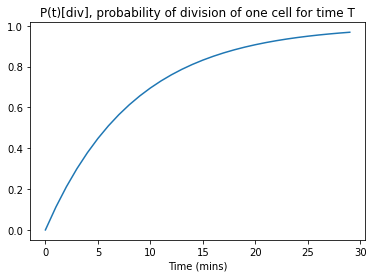

In [503]:
t = np.arange(0,30, 1)
Pt = 1 - np.exp((-lambda_d*t))
plt.plot(Pt)
plt.title('P(t)[div], probability of division of one cell for time T')
plt.xlabel('Time (mins)')

Is the intrinsic rate of division calculated correctly? Should I not just glean a rate of division from the immediate aftermath of the focal apoptoses? But this is in order to generate a Poisson process plot so want an average of division rates across the epithelia spatiotemporal scans

# Mean division rate per min per unit area

In [435]:
i

'GV0797_Pos7_Scr-9'

In [434]:
cumu_scan_df[i]

,Cell ID,Distance,Time,Frame
0,52,247.333333,-21.800000,78
1,62,41.000000,-11.600000,231
2,61,281.333333,-21.333333,85
3,58,277.666667,-21.400000,84
4,56,295.666667,-0.133333,403
...,...,...,...,...
420,2169,331.000000,14.733333,626
421,2189,330.333333,15.266667,634
422,2217,469.000000,16.400000,651
423,2242,196.000000,15.666667,640


In [436]:
scan_time_ranges[i]

{'Time range': 44.733333333333334, 'Distance range': 475.6666666666667}

So, for scan ID 'GV0797_Pos7_Scr-9', there were 425 divisions observed over 44.73 hours and a radius of 475.6 microns. This results in division rate per hour per um^2 of 

425/(44.73 x pi x 475.6^2) 

In [439]:
425/(44.73333333333333333 * np.pi * 475.666666666666666666666**2) 

1.336602778077184e-05

In [389]:
div_rate_per_area = []
for i in cumu_scan_df:
    scan_area = np.pi*scan_time_ranges[i]['Distance range']**2
    div_rate_per_area.append(len(cumu_scan_df[i])/(scan_time_ranges[i]['Time range']*scan_area))

Text(0.5, 1.0, 'Distribution of division rates (N. div per hour per area)')

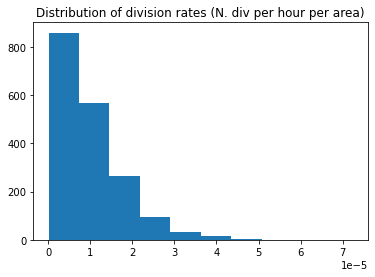

In [390]:
plt.hist(div_rate_per_area)#, bins = np.arange(0,40))
plt.title('Distribution of division rates (N. div per hour per area)')

In [393]:
np.mean(div_rate_per_area)/60

1.6373688047283523e-07

##### Mean division rate over all movies is 1.6373688047283523e-07 per min per um**2

# Cumulative probability that there is NO division distance x from focal apoptosis in a time period of 800 frames

In [58]:
## intrinsic rate of death per minute per unit of surface area (um**2)
lambda_c = 1.6373688047283523e-07#np.mean(div_rate_per_area)/60

In [467]:
x = np.arange(0,500, 1)
t = np.arange(-800, 800, 1) ## should t just be a single window of time??
t = 800*4

In [468]:
Fx = 1 - np.exp(-lambda_c*np.pi*t*x)

Text(0, 0.5, 'Cumulative probability function \nof no divisions distance x from focal apoptosis')

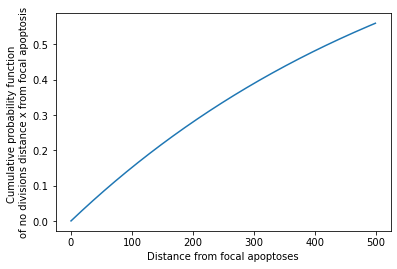

In [470]:
plt.plot(x, Fx)
plt.xlabel('Distance from focal apoptoses')
plt.ylabel('Cumulative probability function \nof no divisions distance x from focal apoptosis')

# Dispersion analysis - need a simulated poission process map of cell divisions

Is this just a 2d graph of the previous two??

In [60]:
x = np.arange(0,1600, 1)
t = np.arange(-800, 800, 1) 
Fx = 1 - np.exp(-lambda_c*np.pi*t*x)

In [66]:
Fx_df = pd.DataFrame()

In [127]:
T = np.arange(0, 800)
Y = np.arange(0, 800)

In [128]:
test = np.zeros((800,800))
for t in T:
    for y in Y:
        test[t, y] = f(t-400, y)

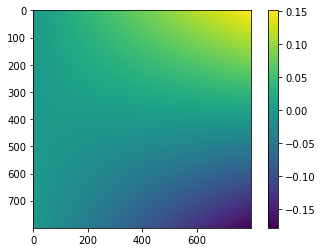

In [130]:
plt.imshow(np.flipud(test))
plt.
plt.colorbar()

In [131]:
Fx_df = pd.DataFrame(test)

In [153]:
Fx_df.rename(columns= {n:i for n, i in enumerate(range(-400,400))})

,-400,-399,-398,-397,-396,-395,-394,-393,-392,-391,...,390,391,392,393,394,395,396,397,398,399
0,0.0,-0.000206,-0.000412,-0.000617,-0.000823,-0.001029,-0.001235,-0.001441,-0.001647,-0.001854,...,-0.176506,-0.176748,-0.176990,-0.177232,-0.177474,-0.177717,-0.177959,-0.178201,-0.178444,-0.178686
1,0.0,-0.000205,-0.000411,-0.000616,-0.000821,-0.001027,-0.001232,-0.001438,-0.001643,-0.001849,...,-0.176028,-0.176269,-0.176510,-0.176752,-0.176993,-0.177235,-0.177477,-0.177718,-0.177960,-0.178202
2,0.0,-0.000205,-0.000410,-0.000614,-0.000819,-0.001024,-0.001229,-0.001434,-0.001639,-0.001844,...,-0.175550,-0.175790,-0.176031,-0.176272,-0.176513,-0.176754,-0.176995,-0.177236,-0.177477,-0.177718
3,0.0,-0.000204,-0.000409,-0.000613,-0.000817,-0.001022,-0.001226,-0.001431,-0.001635,-0.001840,...,-0.175072,-0.175312,-0.175552,-0.175792,-0.176032,-0.176273,-0.176513,-0.176753,-0.176993,-0.177234
4,0.0,-0.000204,-0.000407,-0.000611,-0.000815,-0.001019,-0.001223,-0.001427,-0.001631,-0.001835,...,-0.174595,-0.174834,-0.175073,-0.175313,-0.175552,-0.175792,-0.176031,-0.176271,-0.176510,-0.176750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.000203,0.000406,0.000609,0.000812,0.001015,0.001218,0.001421,0.001624,0.001827,...,0.148297,0.148470,0.148643,0.148816,0.148988,0.149161,0.149334,0.149507,0.149680,0.149853
796,0.0,0.000204,0.000407,0.000611,0.000814,0.001018,0.001221,0.001425,0.001628,0.001832,...,0.148643,0.148816,0.148989,0.149163,0.149336,0.149509,0.149682,0.149856,0.150029,0.150202
797,0.0,0.000204,0.000408,0.000612,0.000817,0.001021,0.001225,0.001428,0.001632,0.001836,...,0.148988,0.149162,0.149336,0.149510,0.149683,0.149857,0.150031,0.150204,0.150378,0.150551
798,0.0,0.000205,0.000409,0.000614,0.000819,0.001023,0.001228,0.001432,0.001636,0.001841,...,0.149334,0.149508,0.149682,0.149857,0.150031,0.150205,0.150378,0.150552,0.150726,0.150900


# Code from paper

In [155]:
def simulate_data(numsim, at, ax, ay, lamb, withfeedback=False, charL=0, charT=0, charD=0):
    """simulation of data recreating experimental setting
    
    Parameters
    ----------
    numsim :
        numebr of desired siimulations
    
    at:
        size of the domain in time
    
    ax:
        size of the domain in x-axis
    
    ay:
        size of the domain in y-axis
    
    lamb:
        lambda, parameter of Piosson process 
    
    withfeedback=False :
        a boolean flag.
        If False simulate Poisson process.
        If True the simlated process is with feedback and needs further 
        parameters.   
    
    charL=0 :
        radius of the inhibition region, region around a given event where we
        can not observe a following event during soem period of time (period 
        of time is defined with charT)
    
    charT=0 :
        size of the feedback in time, i.e. how long after one event the next 
        event can not be generated in its proximity (proximity is defined with 
        charL)
    
    charD=0 :
        delay effect of feedback. It is a time parameter. During time of charD
        there is no inhibition effect of the event. 
     
    Returns
    -------
    txyall :
        list of simulated events on extended region, used to reduce a boundary
        effect. The time of event is set in time resolution of 5 min, as in 
        the actual experiment.
    
    roiall :
        subset of txyall, list of simulated events on Region of interest.
    
    efflamball :
        effective lambda computed for each simulation : 
            number of events / space-time volume of the domain
        For pure Poisson process effective lambda tends to lamb with time. 
        For process with feedback effective lambda is smaller than lamb. 
    """
    roiall = []
    txyall = []
    efflamball = []
    
    x0min = -ax/2. - charL
    x0max =  ax/2. + charL
    y0min = -ay/2. - charL
    y0max =  ay/2. + charL

    l = lamb*(ax+2*charL)*(ay+2*charL)
    
    #twaste - allows process to reach a sort of a steady state
    twaste = 1000/l
    if not withfeedback:
        twaste = 0
    
    for i in range(numsim):
        txy = []
        roi = []
        t = -twaste
        while t <= at:
            rand = rnd.random()
            t -= math.log(rand)/l
            x = x0min + (x0max-x0min)*rnd.random()
            y = y0min + (y0max-y0min)*rnd.random()
            remove = False
            if withfeedback:
                i = len(txy)-1
                while i >= 0:
                    te, xe, ye = txy[i]
                    if te <= t - charT - charD:
                        break
                    if te <= t - charD and (xe - x)**2 + (ye - y)**2 < charL**2:
                        remove = True
                        break
                    i -= 1
            if not remove:         
                txy.append((t, x, y))
        
        txy = [(int(5*np.floor(t/5)+5),x,y) for t,x,y in txy]
        roi = [(t,x,y) for t,x,y in txy if t>=0 and -ax/2. <= x <= ax/2. and -ay/2. <= y <= ay/2.]
        
        efflamb = len(roi)/(at*ax*ay)
        efflamball.append(efflamb)
        
        roiall.append(np.array(roi))
        txyall.append(np.array(txy))
    
    return txyall, roiall,  efflamball


In [157]:
import random as rnd
import math

In [205]:
txyall, roiall,  efflamball = simulate_data(numsim = 1839, at = 1600, ax = 800, ay = 800, lamb =lambda_c)

In [206]:
x = [i[0][1] for i in txyall]
y = [i[0][2] for i in txyall]

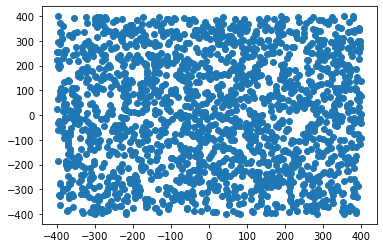

In [207]:
plt.scatter(x, y)

In [214]:
txyall[0]

array([[ 1.50000000e+01,  1.05521878e+02, -3.97502176e+01],
       [ 2.00000000e+01,  1.20226127e+02, -2.14882981e+02],
       [ 3.00000000e+01, -4.50226734e+01, -1.69544424e+02],
       [ 3.00000000e+01,  1.55338544e+02,  2.09238090e+02],
       [ 5.00000000e+01, -8.61194806e+01, -2.45381050e+02],
       [ 9.50000000e+01, -1.21304978e+01,  1.43208081e+02],
       [ 1.20000000e+02, -1.64471814e+02,  2.87746227e+02],
       [ 1.45000000e+02,  1.48592003e+02,  3.29401180e+02],
       [ 1.60000000e+02, -2.12464849e+02, -1.87471103e+02],
       [ 1.65000000e+02,  1.73677522e+02,  8.19044409e+01],
       [ 1.70000000e+02,  3.24423217e+02, -4.61743793e+01],
       [ 1.80000000e+02,  9.32117679e+01, -3.91753680e+02],
       [ 2.15000000e+02, -3.12078751e+02, -2.92432500e+02],
       [ 2.25000000e+02,  3.06039834e+02,  1.89956596e+02],
       [ 2.25000000e+02, -6.21531371e+01,  4.72934815e+00],
       [ 2.60000000e+02,  3.05832272e+02,  1.35399464e+02],
       [ 2.80000000e+02, -2.93896692e+02

In [232]:
# Random labeling test, Space-Time K-Functions
def computeK_faster(txys, dlmax, dtmax):
    """space-time intensity computation, K-functions - optimised version. 
    See deatils in the Supporting information of the article. 
    
    Parameters
    ----------
    txys :
        list of events
        
    dlmax :
        maximal distance in space that interests us. 
    
    dtmax :
        maximal distance in time that interests us. 
    
    Returns
    -------
    vector of intensities
    
    Thanks to Virgile Andreani.
    """
    K = np.zeros((dlmax, dtmax))
    for i, txy in enumerate(txys):
        ## some sort of delta t, difference between the first time coord and latter ones?
        dts = np.abs(txys[:i, 0] - txy[0]).astype(int)
        dxs = np.linalg.norm(txys[:i, 1:] - txy[1:], axis=1).astype(int)
        for dt, dx in zip(dts, dxs):
            K[:dx, :dt] += 1
    vol = np.prod(np.max(txys, axis=0) - np.min(txys, axis=0))
    return K*vol/len(txys)**2

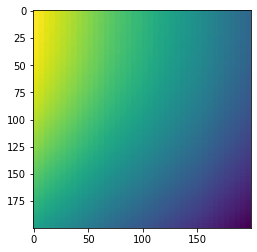

In [236]:
plt.imshow(K)

In [238]:
txys

array([[ 1.50000000e+01,  1.05521878e+02, -3.97502176e+01],
       [ 2.00000000e+01,  1.20226127e+02, -2.14882981e+02],
       [ 3.00000000e+01, -4.50226734e+01, -1.69544424e+02],
       [ 3.00000000e+01,  1.55338544e+02,  2.09238090e+02],
       [ 5.00000000e+01, -8.61194806e+01, -2.45381050e+02],
       [ 9.50000000e+01, -1.21304978e+01,  1.43208081e+02],
       [ 1.20000000e+02, -1.64471814e+02,  2.87746227e+02],
       [ 1.45000000e+02,  1.48592003e+02,  3.29401180e+02],
       [ 1.60000000e+02, -2.12464849e+02, -1.87471103e+02],
       [ 1.65000000e+02,  1.73677522e+02,  8.19044409e+01],
       [ 1.70000000e+02,  3.24423217e+02, -4.61743793e+01],
       [ 1.80000000e+02,  9.32117679e+01, -3.91753680e+02],
       [ 2.15000000e+02, -3.12078751e+02, -2.92432500e+02],
       [ 2.25000000e+02,  3.06039834e+02,  1.89956596e+02],
       [ 2.25000000e+02, -6.21531371e+01,  4.72934815e+00],
       [ 2.60000000e+02,  3.05832272e+02,  1.35399464e+02],
       [ 2.80000000e+02, -2.93896692e+02

In [215]:
txys = txyall[0]

In [234]:
computeK_faster(txys, 200, 200,)

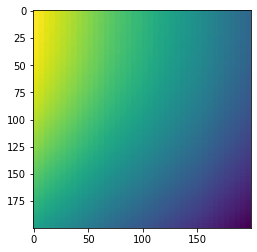

In [217]:

plt.imshow(computeK_faster(txys, 200, 200))

In [230]:
for i, txy in enumerate(txys):
    print(txys[:i, 0], txy[0])
        #np.abs(txys[:i, 0] - txy[0]).astype(int))

[] 15.0
[15.] 20.0
[15. 20.] 30.0
[15. 20. 30.] 30.0
[15. 20. 30. 30.] 50.0
[15. 20. 30. 30. 50.] 95.0
[15. 20. 30. 30. 50. 95.] 120.0
[ 15.  20.  30.  30.  50.  95. 120.] 145.0
[ 15.  20.  30.  30.  50.  95. 120. 145.] 160.0
[ 15.  20.  30.  30.  50.  95. 120. 145. 160.] 165.0
[ 15.  20.  30.  30.  50.  95. 120. 145. 160. 165.] 170.0
[ 15.  20.  30.  30.  50.  95. 120. 145. 160. 165. 170.] 180.0
[ 15.  20.  30.  30.  50.  95. 120. 145. 160. 165. 170. 180.] 215.0
[ 15.  20.  30.  30.  50.  95. 120. 145. 160. 165. 170. 180. 215.] 225.0
[ 15.  20.  30.  30.  50.  95. 120. 145. 160. 165. 170. 180. 215. 225.] 225.0
[ 15.  20.  30.  30.  50.  95. 120. 145. 160. 165. 170. 180. 215. 225.
 225.] 260.0
[ 15.  20.  30.  30.  50.  95. 120. 145. 160. 165. 170. 180. 215. 225.
 225. 260.] 280.0
[ 15.  20.  30.  30.  50.  95. 120. 145. 160. 165. 170. 180. 215. 225.
 225. 260. 280.] 285.0
[ 15.  20.  30.  30.  50.  95. 120. 145. 160. 165. 170. 180. 215. 225.
 225. 260. 280. 285.] 295.0
[ 15.  20.  30.

In [231]:
for i, txy in enumerate(txys):
    print(np.abs(txys[:i, 0] - txy[0]).astype(int))

[]
[5]
[15 10]
[15 10  0]
[35 30 20 20]
[80 75 65 65 45]
[105 100  90  90  70  25]
[130 125 115 115  95  50  25]
[145 140 130 130 110  65  40  15]
[150 145 135 135 115  70  45  20   5]
[155 150 140 140 120  75  50  25  10   5]
[165 160 150 150 130  85  60  35  20  15  10]
[200 195 185 185 165 120  95  70  55  50  45  35]
[210 205 195 195 175 130 105  80  65  60  55  45  10]
[210 205 195 195 175 130 105  80  65  60  55  45  10   0]
[245 240 230 230 210 165 140 115 100  95  90  80  45  35  35]
[265 260 250 250 230 185 160 135 120 115 110 100  65  55  55  20]
[270 265 255 255 235 190 165 140 125 120 115 105  70  60  60  25   5]
[280 275 265 265 245 200 175 150 135 130 125 115  80  70  70  35  15  10]
[280 275 265 265 245 200 175 150 135 130 125 115  80  70  70  35  15  10
   0]
[290 285 275 275 255 210 185 160 145 140 135 125  90  80  80  45  25  20
  10  10]
[290 285 275 275 255 210 185 160 145 140 135 125  90  80  80  45  25  20
  10  10   0]
[310 305 295 295 275 230 205 180 165 160 155

In [229]:
txy

array([1605.        , -310.88237589,  321.75120737])

In [228]:
txys

array([[ 1.50000000e+01,  1.05521878e+02, -3.97502176e+01],
       [ 2.00000000e+01,  1.20226127e+02, -2.14882981e+02],
       [ 3.00000000e+01, -4.50226734e+01, -1.69544424e+02],
       [ 3.00000000e+01,  1.55338544e+02,  2.09238090e+02],
       [ 5.00000000e+01, -8.61194806e+01, -2.45381050e+02],
       [ 9.50000000e+01, -1.21304978e+01,  1.43208081e+02],
       [ 1.20000000e+02, -1.64471814e+02,  2.87746227e+02],
       [ 1.45000000e+02,  1.48592003e+02,  3.29401180e+02],
       [ 1.60000000e+02, -2.12464849e+02, -1.87471103e+02],
       [ 1.65000000e+02,  1.73677522e+02,  8.19044409e+01],
       [ 1.70000000e+02,  3.24423217e+02, -4.61743793e+01],
       [ 1.80000000e+02,  9.32117679e+01, -3.91753680e+02],
       [ 2.15000000e+02, -3.12078751e+02, -2.92432500e+02],
       [ 2.25000000e+02,  3.06039834e+02,  1.89956596e+02],
       [ 2.25000000e+02, -6.21531371e+01,  4.72934815e+00],
       [ 2.60000000e+02,  3.05832272e+02,  1.35399464e+02],
       [ 2.80000000e+02, -2.93896692e+02

In [227]:
txys[:1, 0]

array([15.])

In [224]:
txys[:1, 0]

array([15.])

In [220]:
np.abs(txys[:i, 0] - txy[0]).astype(int)


array([], dtype=int64)

In [277]:
N_events_np = pd.DataFrame()
N_events_np['Time'] = N_events_df['Time']
N_events_np['Distance'] = N_events_df['Distance']

In [278]:
N_events_np = N_events_np.to_numpy(dtype = int)

In [279]:
N_events_np

array([[-12, 178],
       [-34, 262],
       [-35, 300],
       ...,
       [ 34, 371],
       [ 35, 370],
       [ 35, 208]])

In [ ]:
N_events_np

In [258]:
computeK_faster(N_events_np[0:200], 200, 200,)

array([[19483., 18716., 17990., ...,     0.,     0.,     0.],
       [19345., 18583., 17861., ...,     0.,     0.,     0.],
       [19197., 18440., 17724., ...,     0.,     0.,     0.],
       ...,
       [ 1945.,  1874.,  1784., ...,     0.,     0.,     0.],
       [ 1915.,  1848.,  1758., ...,     0.,     0.,     0.],
       [ 1882.,  1815.,  1730., ...,     0.,     0.,     0.]])

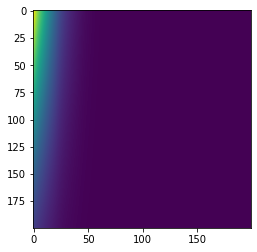

In [262]:
plt.imshow(computeK_faster(N_events_np[0:2000], 200, 200,))

In [263]:
def pvaluesTest_faster(TXY, dlmax, dtmax, N):
    """Computng p-values for dispersion of events - optimised version.
    See p-values Test. 
    See deatils in the Supporting information of the article.
    
    Parameters
    ----------
    txy :
        set of events
        
    dlmax :
        maximal distance in space that interests us. 
    
    dtmax :
        maximal distance in time that interests us. 
    
    N :
        number of permutations we simulate, important for theoretical
        minimal p-value. 
    
    Returns
    -------
    P_clust, P_disp : matrices of p-values for clustering 
    and for dispersion of events. We are interested in P_disp.
    
    Thanks to Virgile Andreani.
    """
    txy = np.array(TXY)
    K0 = computeK_faster(txy, dlmax, dtmax)
    M_minus = np.zeros((dlmax, dtmax))
    M_plus = np.zeros((dlmax, dtmax))
    for i in range(N):
        np.random.shuffle(txy[:, 0])
        K = computeK_faster(txy, dlmax, dtmax)
        M_minus += K <= K0
        M_plus += K >= K0
    #space-time dispersion p-value
    P_clust = (M_plus+1) / (N+1)
    P_disp = (M_minus+1) / (N+1)
    return P_clust, P_disp

In [288]:
pval = pvaluesTest_faster(N_events_np[0:2000],1600, 1600, 5)

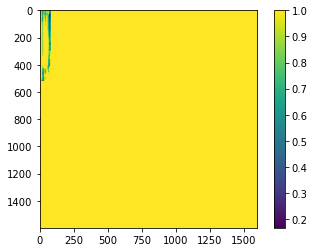

In [291]:
plt.imshow(pval[0])
plt.colorbar()

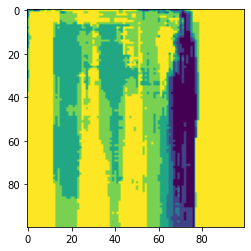

In [294]:
plt.imshow(pval[0][0:100, 0:100])

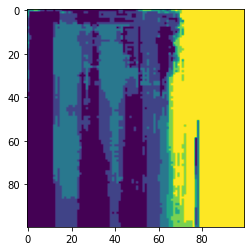

In [295]:
plt.imshow(pval[1][0:100, 0:100])

Text(0.5, 1.0, 'Clustering initial output')

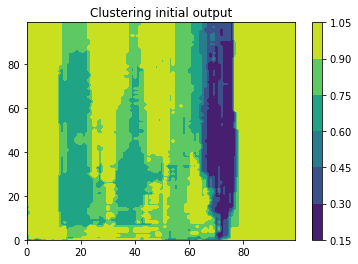

In [299]:
plt.contourf(pval[0][0:100, 0:100])
plt.colorbar()
plt.title('Clustering initial output')

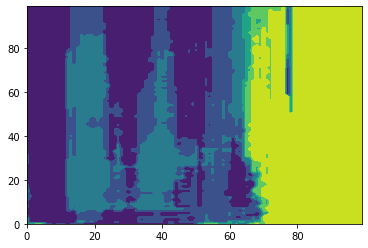

In [296]:
plt.contourf(pval[1][0:100, 0:100])

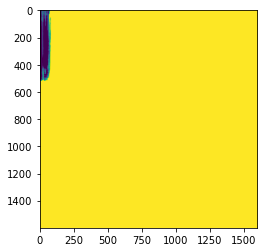

In [290]:
plt.imshow(pval[1])

In [284]:
test = N_events_np[:10]

In [285]:
test

array([[-34, 178],
       [-12, 262],
       [-43, 300],
       [-43, 255],
       [-26, 148],
       [-22, 308],
       [-33, 208],
       [-22, 191],
       [-24, 231],
       [-32, 267]])

In [286]:
np.random.shuffle(test[:, 0])

In [287]:
test

array([[-43, 178],
       [-26, 262],
       [-22, 300],
       [-12, 255],
       [-33, 148],
       [-24, 308],
       [-32, 208],
       [-22, 191],
       [-34, 231],
       [-43, 267]])

# Questiiionsss: can this script deal with negative time points? 
Could split into negative and positive time if thats the case

Read paper and annotate analysis above